<a href="https://colab.research.google.com/github/devg20/sales-prediction-ML/blob/master/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required packages


In [ ]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
#warnings.filterwarnings('ignore')

Loading training data(file path to be updated accordingly).

In [ ]:
df = glob.glob("/content/drive/MyDrive/Projects/ML/SalesPrediction/dataset/Train.csv")

Data Analysis and Pre-processing

In [ ]:
data = pd.read_csv(df[0])
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
data.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Pre-Processing


In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
cat_col = []
#print(data.dtypes.index)
for ele in data.dtypes.index:
  if data.dtypes[ele] == "object":
    cat_col.append(ele)
print(*cat_col, sep="\n")

Item_Identifier
Item_Fat_Content
Item_Type
Outlet_Identifier
Outlet_Size
Outlet_Location_Type
Outlet_Type


In [ ]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
print(*cat_col, sep="\n")

Item_Fat_Content
Item_Type
Outlet_Size
Outlet_Location_Type
Outlet_Type


In [ ]:
for col in cat_col:
    print(col)
    print(data[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [ ]:

# fill the missing values
item_weight_mean = data.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [ ]:
miss_bool = data['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [ ]:
# filling missing item weight values
for i, item in enumerate(data['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            data['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            data['Item_Weight'][i] = np.mean(data['Item_Weight'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:

data['Item_Weight'].isnull().sum()

0

In [ ]:
miss_out = data['Outlet_Size'].isnull()
miss_out

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [ ]:
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [ ]:
data.loc[miss_out, 'Outlet_Size'] = data.loc[miss_out, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [ ]:
data['Outlet_Size'].isnull().sum()

0

In [ ]:
sum(data['Item_Visibility']==0)

526

In [ ]:
data.loc[:, 'Item_Visibility'].replace([0], [data['Item_Visibility'].mean()], inplace=True)

In [ ]:
sum(data['Item_Visibility']==0)

0

In [ ]:

# combine item fat content
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})

In [ ]:
print("\n",data['Item_Fat_Content'].value_counts())
print("\n",*data['Item_Fat_Content'].unique(), sep="\n")


 Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Low Fat
Regular


Creating New Attributes


In [ ]:
data['New_Item_Type'] = data['Item_Identifier'].apply(lambda x: x[:2])
data['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [ ]:
data['New_Item_Type'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [ ]:
data['New_Item_Type'] = data['New_Item_Type'].replace({'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks' })
data['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [ ]:
data.loc[data['New_Item_Type'] == 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
#print(*data['Item_Fat_Content'].unique(), sep="\n")
print(data['Item_Fat_Content'].value_counts())

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64


In [ ]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'New_Item_Type'],
      dtype='object')

In [ ]:
#my = max(data['Outlet_Establishment_Year'].unique())

In [ ]:
# dataset collected in 2013
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']

In [ ]:
data['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


# Data Visuazlization post pre-processing

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


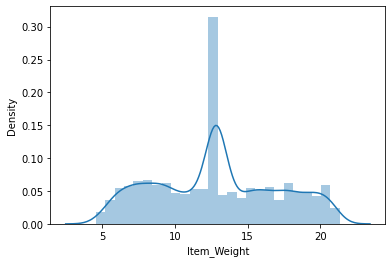

In [ ]:
sns.distplot(data['Item_Weight'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


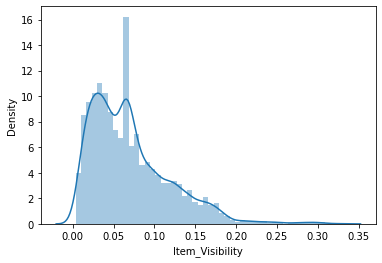

In [ ]:
sns.distplot(data['Item_Visibility'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


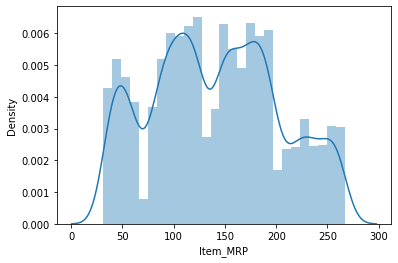

In [ ]:
sns.distplot(data['Item_MRP'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


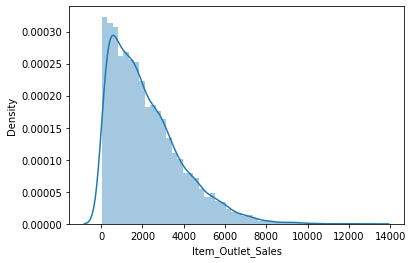

In [ ]:
sns.distplot(data['Item_Outlet_Sales'])

In [ ]:
# log transformation
data['Item_Outlet_Sales'] = np.log(1+data['Item_Outlet_Sales'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


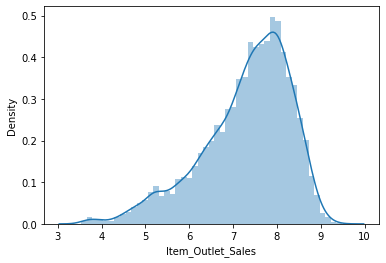

In [ ]:
sns.distplot(data['Item_Outlet_Sales'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


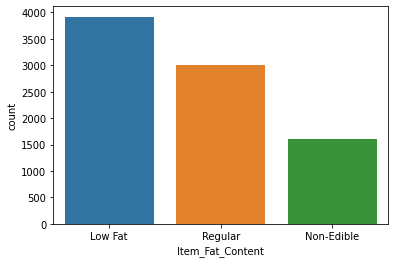

In [ ]:

sns.countplot(data["Item_Fat_Content"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Dairy'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Seafood')]

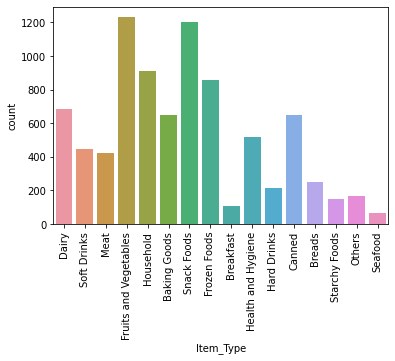

In [ ]:
# plt.figure(figsize=(15,5))
l = list(data['Item_Type'].unique())
chart = sns.countplot(data["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


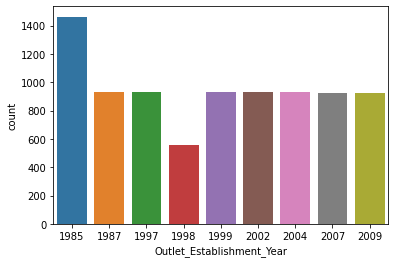

In [ ]:
sns.countplot(data['Outlet_Establishment_Year'])


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


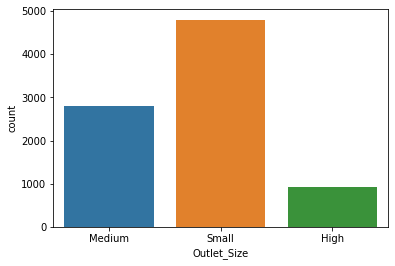

In [ ]:
sns.countplot(data['Outlet_Size'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


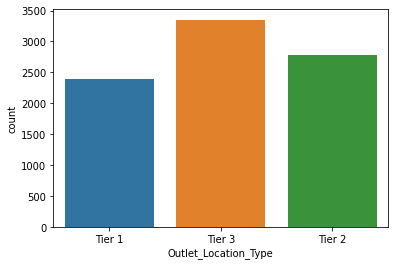

In [ ]:
sns.countplot(data['Outlet_Location_Type'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


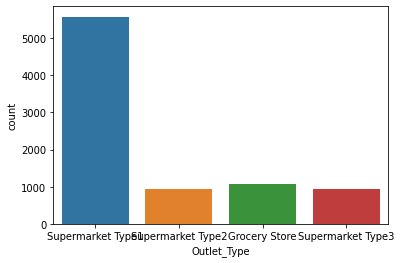

In [ ]:
sns.countplot(data['Outlet_Type'])

Correlation matrix

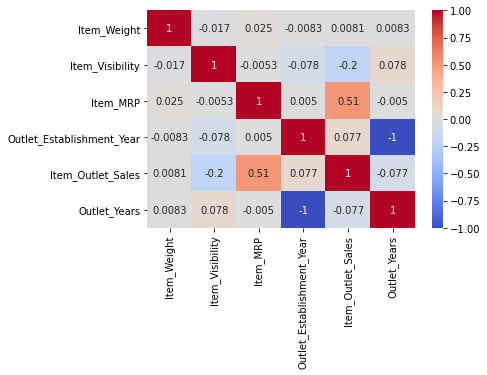

In [ ]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,26


Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    data[col] = le.fit_transform(data[col])

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,8.225808,1,14,9
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,6.096776,0,4,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,7.648868,1,14,9
3,FDX07,19.20,2,0.066132,6,182.0950,OUT010,1998,2,2,0,6.597664,1,15,0
4,NCD19,8.93,1,0.066132,9,53.8614,OUT013,1987,0,2,1,6.903451,2,26,1


In [ ]:
data = pd.get_dummies(data, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
print(data.head())

  Item_Identifier  Item_Weight  ...  New_Item_Type_1  New_Item_Type_2
0           FDA15         9.30  ...                1                0
1           DRC01         5.92  ...                0                0
2           FDN15        17.50  ...                1                0
3           FDX07        19.20  ...                1                0
4           NCD19         8.93  ...                0                1

[5 rows x 26 columns]


In [ ]:
print(data.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales', 'Outlet_Years', 'Outlet', 'Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Item_Fat_Content_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3', 'New_Item_Type_0',
       'New_Item_Type_1', 'New_Item_Type_2'],
      dtype='object')


Input Split


In [ ]:

origX = data.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
origy = data['Item_Outlet_Sales']

In [ ]:
X = origX
y = origy

Model Training

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    model.fit(X, y)
    print("\nTraining")
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("\n***Model Report***")
    print("\nMSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)

Using Linear Regression


Training

***Model Report***

MSE: 0.2880065032501795
CV Score: 0.2892423116229724


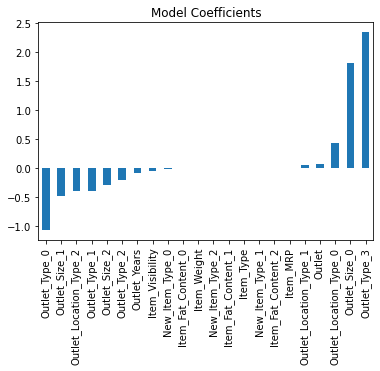

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
modelLR = LinearRegression(normalize=True)
train(modelLR, X, y)
coef = pd.Series(modelLR.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Using Ridge Regression


Training

***Model Report***

MSE: 0.4280298560568349
CV Score: 0.4289289251562643


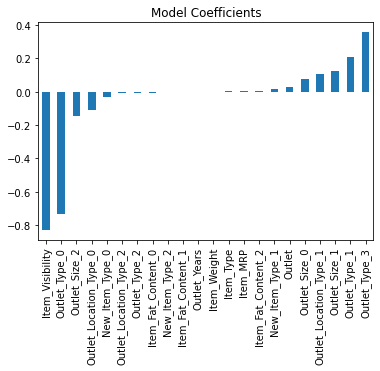

In [ ]:
modelR = Ridge(normalize=True)
train(modelR, X, y)
coef = pd.Series(modelR.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Using Lasso Regression


Training

***Model Report***

MSE: 0.7628688679102087
CV Score: 0.7630789166281843


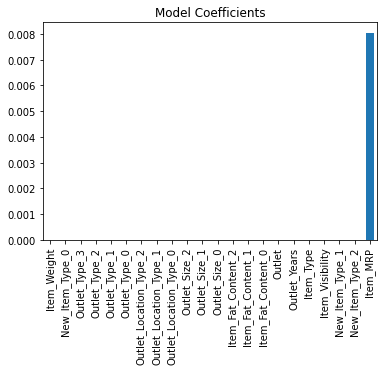

In [ ]:
modelL = Lasso()
train(modelL, X, y)
coef = pd.Series(modelL.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Using DecisionTree Regression


Training

***Model Report***

MSE: 9.251544668064852e-11
CV Score: 0.5750253883071632


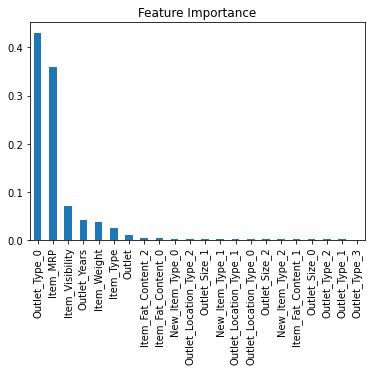

In [ ]:
from sklearn.tree import DecisionTreeRegressor
modelDTR = DecisionTreeRegressor()
train(modelDTR, X, y)
coef = pd.Series(modelDTR.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Using RandomForest Regression


Training

***Model Report***

MSE: 0.04253503451800275
CV Score: 0.3105413260355934


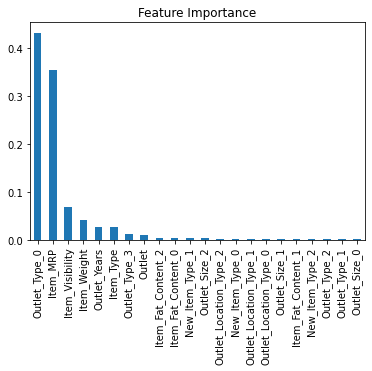

In [ ]:

from sklearn.ensemble import RandomForestRegressor
modelRFR = RandomForestRegressor()
train(modelRFR, X, y)
coef = pd.Series(modelRFR.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Using ExtraTrees Regression


Training

***Model Report***

MSE: 9.647126599617807e-13
CV Score: 0.3321211825363144


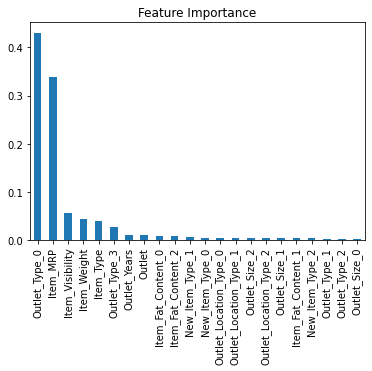

In [ ]:

from sklearn.ensemble import ExtraTreesRegressor
modelETR = ExtraTreesRegressor()
train(modelETR, X, y)
coef = pd.Series(modelETR.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Pickling and saving all models

In [ ]:
import pickle
pickle.dump(modelLR, open('/content/drive/MyDrive/Projects/ML/SalesPrediction/modelLR.sav', 'wb'))
pickle.dump(modelR, open('/content/drive/MyDrive/Projects/ML/SalesPrediction/modelR.sav', 'wb'))
pickle.dump(modelL, open('/content/drive/MyDrive/Projects/ML/SalesPrediction/modelL.sav', 'wb'))
pickle.dump(modelDTR, open('/content/drive/MyDrive/Projects/ML/SalesPrediction/modelDTR.sav', 'wb'))
pickle.dump(modelRFR, open('/content/drive/MyDrive/Projects/ML/SalesPrediction/modelRFR.sav', 'wb'))
pickle.dump(modelETR, open('/content/drive/MyDrive/Projects/ML/SalesPrediction/modelETR.sav', 'wb'))

Loading Models

In [ ]:
import pickle
modelLR = pickle.load(open('/content/drive/MyDrive/Projects/ML/SalesPrediction/modelLR.sav', 'rb'))

Testing

In [ ]:
dftest = glob.glob("/content/drive/MyDrive/Projects/ML/SalesPrediction/dataset/Train.csv")

In [ ]:
data = pd.read_csv(dftest[0])
data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Pre-processing

In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
miss_bool = data['Item_Weight'].isnull()
# filling missing item weight values
for i, item in enumerate(data['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            data['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            data['Item_Weight'][i] = np.mean(data['Item_Weight'])
data['Item_Weight'].isnull().sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0

In [ ]:
miss_out = data['Outlet_Size'].isnull()
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
data.loc[miss_out, 'Outlet_Size'] = data.loc[miss_out, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
data['Outlet_Size'].isnull().sum()

0

In [ ]:
sum(data['Item_Visibility']==0)
data.loc[:, 'Item_Visibility'].replace([0], [data['Item_Visibility'].mean()], inplace=True)
sum(data['Item_Visibility']==0)

0

In [ ]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})

print("\n",data['Item_Fat_Content'].value_counts())
print("\n",*data['Item_Fat_Content'].unique(), sep="\n")


 Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Low Fat
Regular


In [ ]:

data['New_Item_Type'] = data['Item_Identifier'].apply(lambda x: x[:2])
data['New_Item_Type'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [ ]:
data['New_Item_Type'] = data['New_Item_Type'].replace({'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks' })
data['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [ ]:
data.loc[data['New_Item_Type'] == 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
#print(*data['Item_Fat_Content'].unique(), sep="\n")
print(data['Item_Fat_Content'].value_counts())

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64


In [ ]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'New_Item_Type'],
      dtype='object')

In [ ]:

data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']

data['Item_Outlet_Sales'] = np.log(1+data['Item_Outlet_Sales'])

In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    data[col] = le.fit_transform(data[col])

data = pd.get_dummies(data, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
print(data.head())

  Item_Identifier  Item_Weight  ...  New_Item_Type_1  New_Item_Type_2
0           FDA15         9.30  ...                1                0
1           DRC01         5.92  ...                0                0
2           FDN15        17.50  ...                1                0
3           FDX07        19.20  ...                1                0
4           NCD19         8.93  ...                0                1

[5 rows x 26 columns]


In [ ]:
testX = data.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
testY = data['Item_Outlet_Sales']

In [ ]:
pred_sales = modelLR.predict(testX)
result = modelLR.score(testX, testY)
print(result)

0.7205267398812387


In [ ]:
d = {'Item_Outlet_Sales': data['Item_Outlet_Sales'], 'Predicted_Sales': pred}
orig_pred_data = pd.DataFrame(d)
print(orig_pred_data)

      Item_Outlet_Sales  Predicted_Sales
0              8.225808         8.436952
1              6.096776         6.564114
2              7.648868         7.538346
3              6.597664         5.890339
4              6.903451         6.751330
...                 ...              ...
8518           7.929984         8.086476
8519           6.310436         7.197214
8520           7.085159         7.092371
8521           7.521100         7.028016
8522           6.642056         6.931891

[8523 rows x 2 columns]


0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

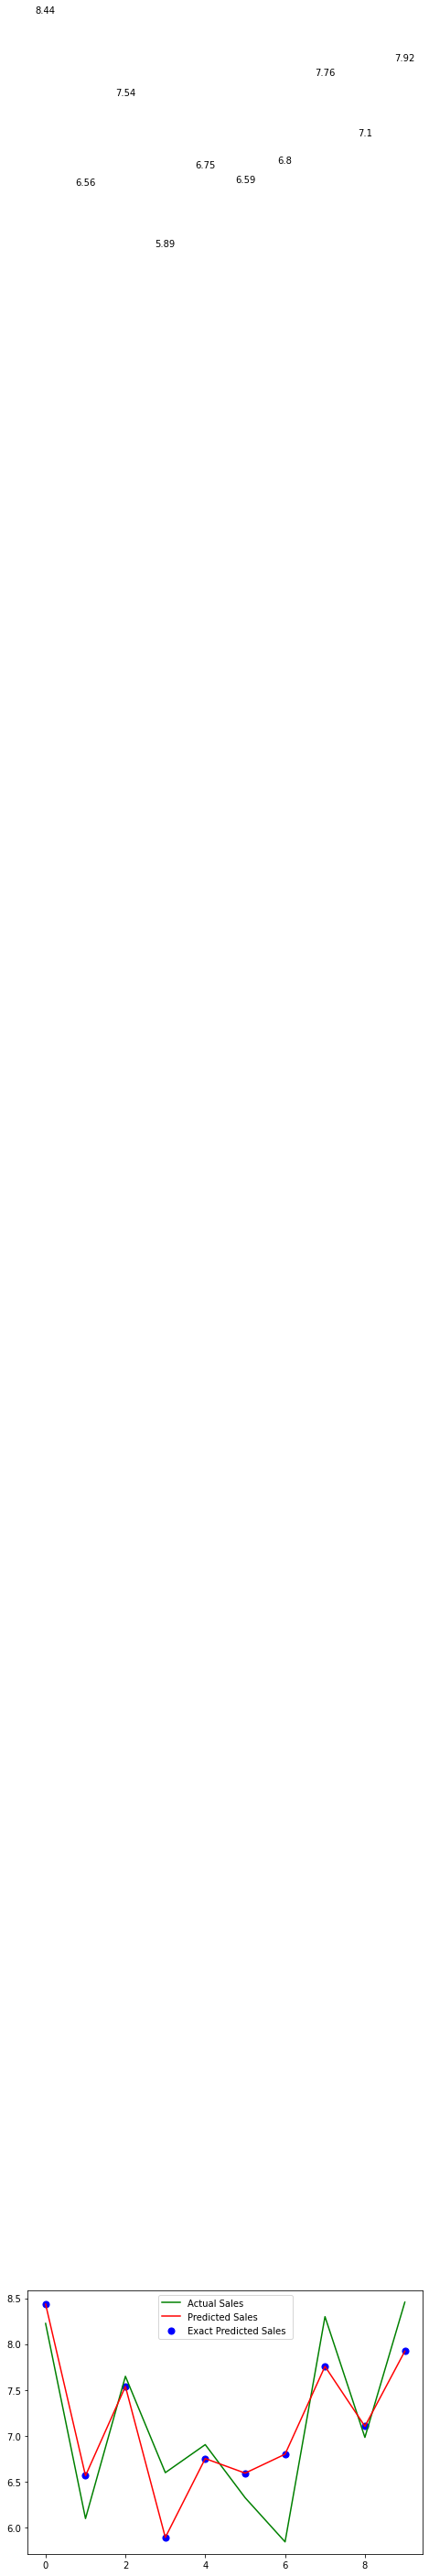

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(data.index[:10], testY[:10], color="green", label="Actual Sales")
ax.plot(data.index[:10], pred[:10], color="red", label="Predicted Sales")
ax.scatter(data.index[:10], pred[:10], color="blue", s=50, label="Exact Predicted Sales ")
for i, v in enumerate(pred[:10]):
    ax.text(i, v+25, round(v,2), ha="center")
ax.legend(loc="upper center")
plt.show()